In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

**Data Cleaning**

In [5]:
df['Unnamed: 4'].value_counts()

Unnamed: 4
GNT:-)"                                                     2
 just Keep-in-touch\" gdeve.."                              1
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns={'v1': 'Target','v2': 'Text'},inplace=True)

In [10]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['Target'] = df['Target'].map({'ham':0,'spam':1})

In [12]:
df.isna().sum()

Target    0
Text      0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    5169
True      403
Name: count, dtype: int64

In [14]:
df.drop_duplicates(inplace=True,keep='first')

In [15]:
df.duplicated().value_counts()

False    5169
Name: count, dtype: int64

**EDA**

In [16]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

Data is Inbalanced

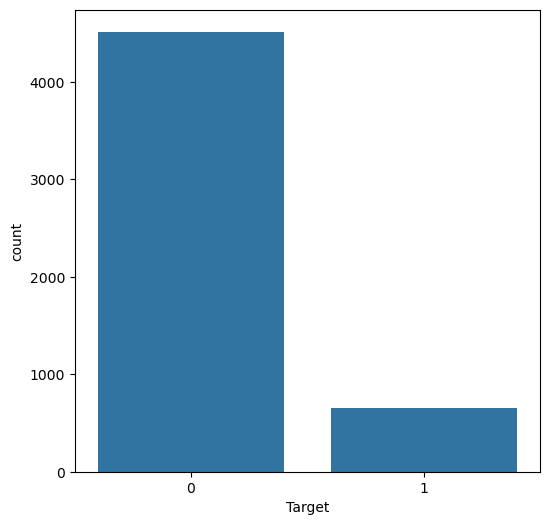

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x = df['Target'],)
plt.show()

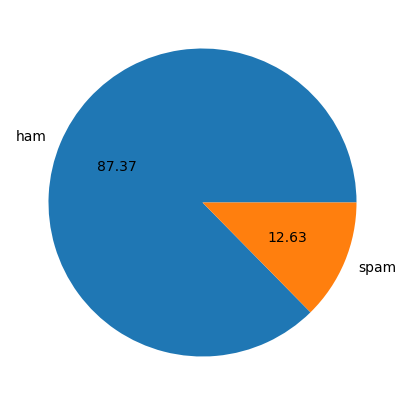

In [18]:
plt.figure(figsize=(5,5))
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohdm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# Number of Characters
df['num_characters']= df['Text'].apply(len)

In [21]:
df['Text'][1]

'Ok lar... Joking wif u oni...'

In [22]:
# Number of Words
# df['num_words'] = df['Text'].str.split().apply(len) -->> Different answer with this
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df.head(9)

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
6,0,Even my brother is not like to speak with me. ...,77,18
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31
8,1,WINNER!! As a valued network customer you have...,158,32


In [24]:
# Number of Sentence
# df['num_words'] = df['Text'].str.split().apply(len) -->> Different answer with this
df['num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,Target,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,Target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
#  Ham Messages
df[df['Target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Spam Messages
df[df['Target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


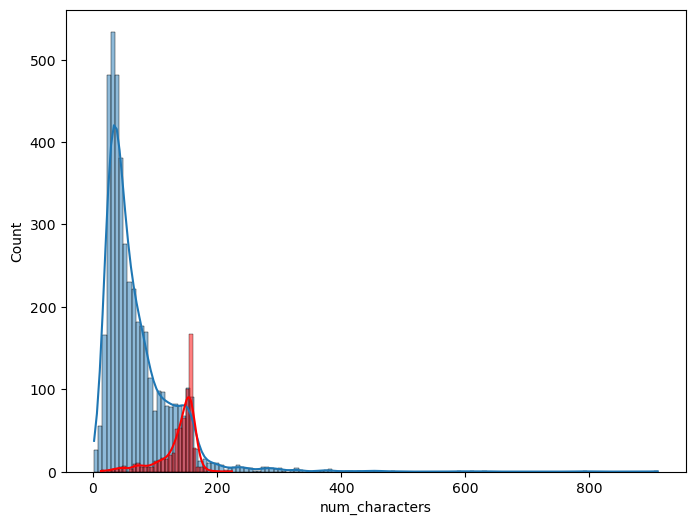

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['Target']==0]['num_characters'],kde=True)
sns.histplot(df[df['Target']==1]['num_characters'],color='red',kde=True)
plt.show()

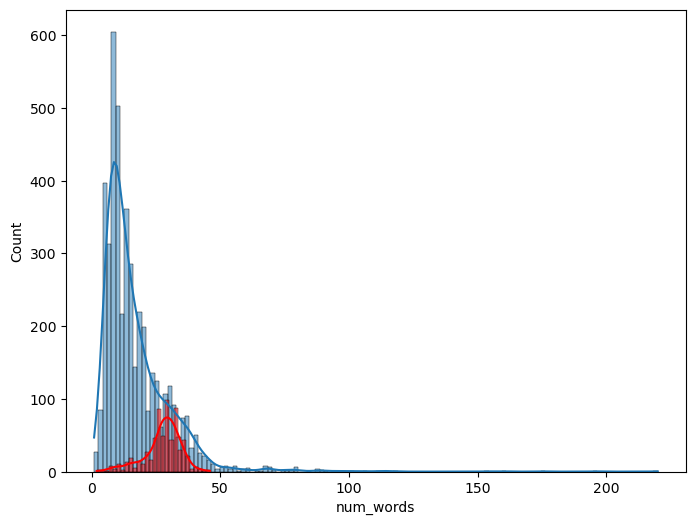

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['Target']==0]['num_words'],kde=True)
sns.histplot(df[df['Target']==1]['num_words'],color='red',kde=True)
plt.show()

C:\Users\mohdm\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


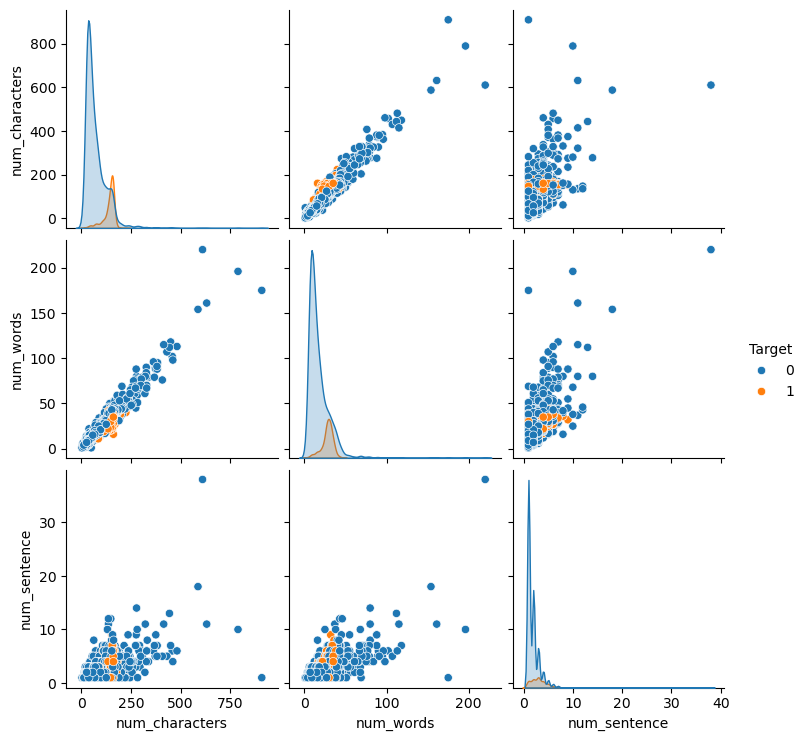

In [31]:
sns.pairplot(df,hue='Target')

<Axes: >

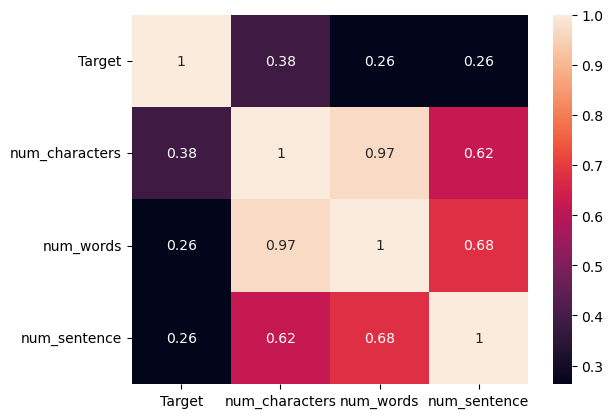

In [32]:
sns.heatmap(df.drop(columns=['Text']).corr(method='pearson'),annot=True)

**Data Preprocessing**

In [33]:
from nltk.corpus import stopwords
stope_words = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

import string 
punc = string.punctuation

In [34]:
# Common with all NLP Models
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stope_words and i not in punc:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [35]:
transform_text("Dancing in the moonlight %%!")

'danc moonlight'

In [36]:
df['Transform_text'] = df['Text'].apply(transform_text)

In [37]:
df.head()

,Target,Text,num_characters,num_words,num_sentence,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Making Word Cloud ->> Most Important Words

In [38]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [39]:
spam_cloud = wc.generate(df[df['Target']==1]['Transform_text'].str.cat(sep=" "))

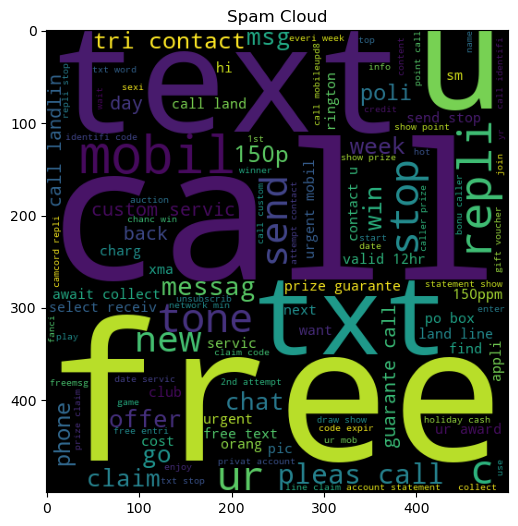

In [40]:
plt.figure(figsize=(6,6))
plt.title('Spam Cloud')
plt.imshow(spam_cloud)
plt.show()

In [41]:
ham_cloud = wc.generate(df[df['Target']==0]['Transform_text'].str.cat(sep = " "))

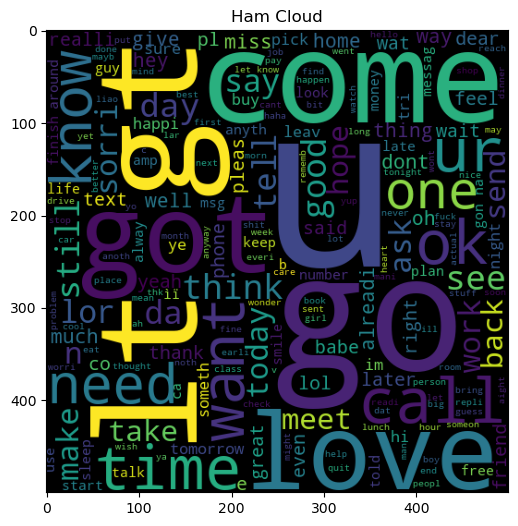

In [42]:
plt.figure(figsize=(6,6))
plt.title('Ham Cloud')
plt.imshow(ham_cloud)
plt.show()

Getting top 30 words

In [43]:
spam_corpus = []
for msg in df[df['Target']==1]['Transform_text'].str.split().tolist():
    for word in msg:
        spam_corpus.append(word)

In [44]:
len(spam_corpus)

9939

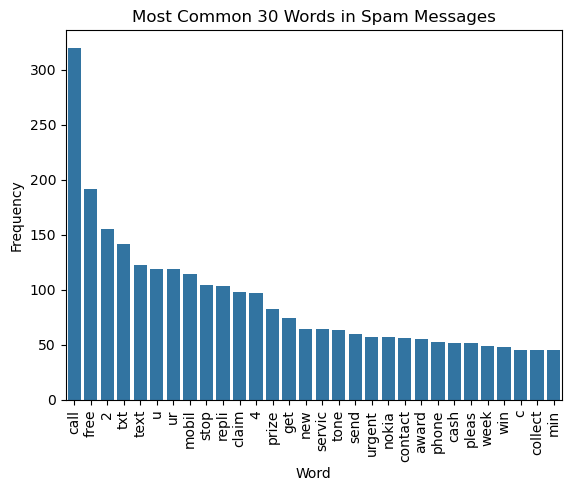

In [45]:
from collections import Counter

spam_corpus_counts = Counter(spam_corpus).most_common(30)

df_spam_counts = pd.DataFrame(spam_corpus_counts, columns=['Word', 'Frequency'])

plt.title("Most Common 30 Words in Spam Messages")
sns.barplot(x='Word', y='Frequency', data=df_spam_counts)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [46]:
ham_corpus = []
for msg in df[df['Target']==0]['Transform_text'].str.split().tolist():
    for word in msg:
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

35404

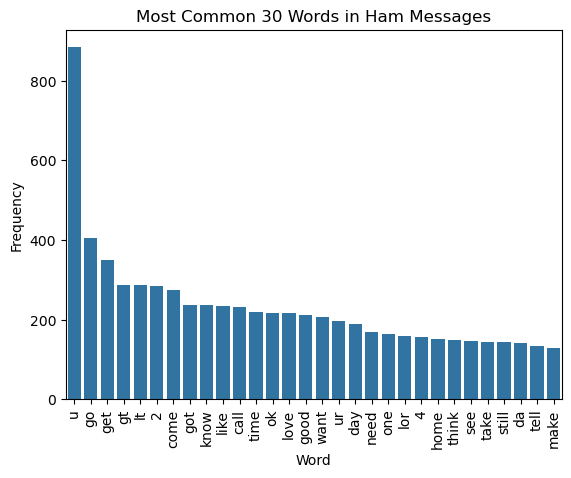

In [48]:
ham_corpus_counts = Counter(ham_corpus).most_common(30)

df_ham_counts = pd.DataFrame(ham_corpus_counts, columns=['Word', 'Frequency'])

plt.title("Most Common 30 Words in Ham Messages")
sns.barplot(x='Word', y='Frequency', data=df_ham_counts)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

**Model Building**

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [50]:
X = tfidf.fit_transform(df['Transform_text']).toarray()

In [51]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
X.shape
# X[0] = SMS , X[1] = Words

(5169, 6708)

In [53]:
y =df['Target'].values

In [54]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [55]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [57]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
gnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)

BernoulliNB()

In [59]:
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

In [60]:
print("Gaussian NB Results: ")
print("Accuracy Using GNB: ",accuracy_score(y_pred_gnb,y_test))
print("Precision Using GNB: ",precision_score(y_test,y_pred_gnb))
print("confusion_matrix Using GNB: \n",confusion_matrix(y_test,y_pred_gnb))

Gaussian NB Results: 
Accuracy Using GNB:  0.8762088974854932
Precision Using GNB:  0.5231481481481481
confusion_matrix Using GNB: 
 [[793 103]
 [ 25 113]]


In [61]:
print("Multinomial NB Results: ")
print("Accuracy Using MNB: ",accuracy_score(y_pred_mnb,y_test))
print("Precision Using MNB: ",precision_score(y_test,y_pred_mnb))
print("confusion_matrix Using MNB: \n",confusion_matrix(y_test,y_pred_mnb))

Multinomial NB Results: 
Accuracy Using MNB:  0.9593810444874274
Precision Using MNB:  1.0
confusion_matrix Using MNB: 
 [[896   0]
 [ 42  96]]


In [62]:
print("Bernoulli NB Results: ")
print("Accuracy Using BNB: ",accuracy_score(y_pred_bnb,y_test))
print("Precision Using BNB: ",precision_score(y_test,y_pred_bnb))
print("confusion_matrix Using BNB: \n",confusion_matrix(y_test,y_pred_bnb))

Bernoulli NB Results: 
Accuracy Using BNB:  0.9700193423597679
Precision Using BNB:  0.9734513274336283
confusion_matrix Using BNB: 
 [[893   3]
 [ 28 110]]


TFIDF -> MNB

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [64]:
svc = SVC(kernel='sigmoid', gamma=0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
gbc = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
ada = AdaBoostClassifier(n_estimators = 50,random_state = 2)
bag = BaggingClassifier(n_estimators = 50,random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [65]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'MNB' : mnb,
    'LRC' : lrc,
    'DTC' : dtc,
    'RFC' : rfc,
    'GBC' : gbc,
    'ADA' : ada,
    'BAG' : bag,
    'ETC' : etc,
    'XGB' : xgb,
}

In [66]:
from sklearn.metrics import accuracy_score, precision_score

def train_clf(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [67]:
accuracy_scores = []
precision_scores = []

for name, model in clfs.items():
    
    accuracy, precision = train_clf(X_train, y_train, X_test, y_test, model)
    
    print(f"For Model {name} :")
    print("Current Accuracy: ", accuracy)
    print("Current Precision: ", precision)
    print("*" * 100)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)


For Model SVC :
Current Accuracy:  0.9110251450676983
Current Precision:  0.9791666666666666
****************************************************************************************************
For Model KN :
Current Accuracy:  0.9003868471953579
Current Precision:  1.0
****************************************************************************************************
For Model MNB :
Current Accuracy:  0.9593810444874274
Current Precision:  1.0
****************************************************************************************************
For Model LRC :
Current Accuracy:  0.9516441005802708
Current Precision:  0.94
****************************************************************************************************
For Model DTC :
Current Accuracy:  0.9342359767891683
Current Precision:  0.8301886792452831
****************************************************************************************************
For Model RFC :
Current Accuracy:  0.971953578336557
Current Precision:  1.

In [68]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [69]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,MNB,0.959381,1.000000
5,RFC,0.971954,1.000000
9,ETC,0.972921,0.982456
0,SVC,0.911025,0.979167
10,XGB,0.972921,0.943548
3,LRC,0.951644,0.940000
6,GBC,0.952611,0.923810
8,BAG,0.958414,0.862595
7,ADA,0.924565,0.840909


In [70]:
performance_df1 = pd.melt(performance_df, id_vars= "Algorithm")

In [71]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,MNB,Accuracy,0.959381
2,RFC,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.911025
5,XGB,Accuracy,0.972921
6,LRC,Accuracy,0.951644
7,GBC,Accuracy,0.952611
8,BAG,Accuracy,0.958414
9,ADA,Accuracy,0.924565


C:\Users\mohdm\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


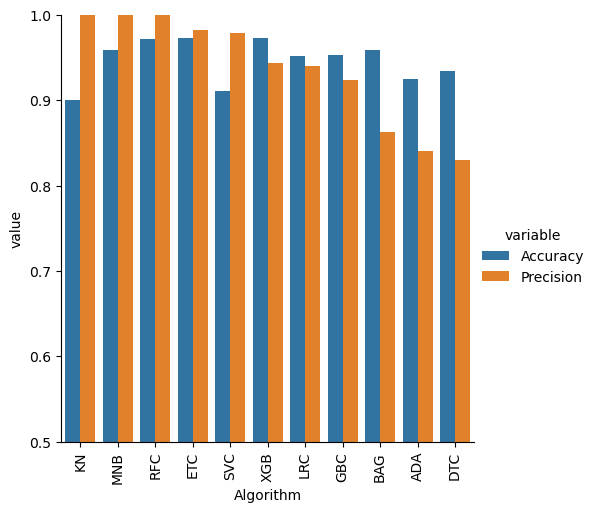

In [72]:
sns.catplot(x='Algorithm', y='value',hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

**Model Improvement**

In [ ]:
# 1. Change the max_features parameter of TfIdf
tfidf_max = TfidfVectorizer(max_features=3000)

X = tfidf_max.fit_transform(df['Transform_text']).toarray()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

accuracy_scores_max_features = []
precision_scores_max_features = []

for name, model in clfs.items():
    
    accuracy, precision = train_clf(X_train, y_train, X_test, y_test, model)
    
    print(f"For Model {name} :")
    print("Current Accuracy: ", accuracy)
    print("Current Precision: ", precision)
    print("*" * 100)
    
    accuracy_scores_max_features.append(accuracy)
    precision_scores_max_features.append(precision)
    
performance_df_tfidf_update = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores_max_features, 'Precision_max_ft_3000':precision_scores_max_features}).sort_values('Precision_max_ft_3000',ascending=False)

# Inference ->> Yes by doing this we got better models 

For Model SVC :
Current Accuracy:  0.9294003868471954
Current Precision:  0.9710144927536232
****************************************************************************************************
For Model KN :
Current Accuracy:  0.9052224371373307
Current Precision:  1.0
****************************************************************************************************
For Model MNB :
Current Accuracy:  0.9709864603481625
Current Precision:  1.0
****************************************************************************************************
For Model LRC :
Current Accuracy:  0.9584139264990329
Current Precision:  0.9702970297029703
****************************************************************************************************
For Model DTC :
Current Accuracy:  0.9274661508704062
Current Precision:  0.8118811881188119
****************************************************************************************************
For Model RFC :
Current Accuracy:  0.9758220502901354
Current

In [74]:
# 2. MinMax Scaling of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
accuracy_scores_scaled = []
precision_scores_scaled = []

for name, model in clfs.items():
    
    accuracy, precision = train_clf(X_train, y_train, X_test, y_test, model)
    
    print(f"For Model {name} :")
    print("Current Accuracy: ", accuracy)
    print("Current Precision: ", precision)
    print("*" * 100)
    
    accuracy_scores_scaled.append(accuracy)
    precision_scores_scaled.append(precision)

performance_df_when_scaled = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_when_scaled':accuracy_scores_scaled, 'Precision_when_scaled':precision_scores_scaled}).sort_values('Precision_when_scaled',ascending=False)

For Model SVC :
Current Accuracy:  0.9700193423597679
Current Precision:  0.9819819819819819
****************************************************************************************************
For Model KN :
Current Accuracy:  0.9052224371373307
Current Precision:  0.9761904761904762
****************************************************************************************************
For Model MNB :
Current Accuracy:  0.9787234042553191
Current Precision:  0.9461538461538461
****************************************************************************************************
For Model LRC :
Current Accuracy:  0.9671179883945842
Current Precision:  0.9642857142857143
****************************************************************************************************
For Model DTC :
Current Accuracy:  0.9274661508704062
Current Precision:  0.8118811881188119
****************************************************************************************************
For Model RFC :
Current Accurac

In [75]:
# 3. Using Number of Characters Features in X

X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print(X.shape) # 3000 + 1


accuracy_scores_char_feat = []
precision_scores_char_feat = []

for name, model in clfs.items():
    
    accuracy, precision = train_clf(X_train, y_train, X_test, y_test, model)
    
    print(f"For Model {name} :")
    print("Current Accuracy: ", accuracy)
    print("Current Precision: ", precision)
    print("*" * 100)
    
    accuracy_scores_char_feat.append(accuracy)
    precision_scores_char_feat.append(precision)

performance_df_char_feat = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_char_feat':accuracy_scores_char_feat, 'Precision_char_feat':precision_scores_char_feat}).sort_values('Precision_char_feat',ascending=False)

(5169, 3001)


C:\Users\mohdm\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For Model SVC :
Current Accuracy:  0.8665377176015474
Current Precision:  0.0
****************************************************************************************************
For Model KN :
Current Accuracy:  0.8858800773694391
Current Precision:  0.8333333333333334
****************************************************************************************************
For Model MNB :
Current Accuracy:  0.9738878143133463
Current Precision:  0.9512195121951219
****************************************************************************************************
For Model LRC :
Current Accuracy:  0.965183752417795
Current Precision:  0.9553571428571429
****************************************************************************************************
For Model DTC :
Current Accuracy:  0.9458413926499033
Current Precision:  0.8867924528301887
****************************************************************************************************
For Model RFC :
Current Accuracy:  0.9690522243

In [76]:
# 4. Voting algorithm
from sklearn.ensemble import VotingClassifier

svc_v = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb_v = MultinomialNB()
etc_v = ExtraTreesClassifier(n_estimators=50, random_state=2)

voting = VotingClassifier(estimators=[('svc',svc_v),('mnb',mnb_v),('etc',etc_v)],voting='soft')
voting.fit(X_train,y_train)
y_pred_v = voting.predict(X_test)

print("Accuracy by Voting :",accuracy_score(y_test,y_pred_v))
print("Precision by Voting :",precision_score(y_test,y_pred_v))

Accuracy by Voting : 0.9738878143133463
Precision by Voting : 1.0


In [77]:
# 5. Applying Stacking
from sklearn.ensemble import StackingClassifier

estimators=[('svc',svc_v),('mnb',mnb_v),('etc',etc_v)]
final_estimator = RandomForestClassifier()

stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking.fit(X_train,y_train)
y_pred_s = stacking.predict(X_test)

print("Accuracy by Voting :",accuracy_score(y_test,y_pred_s))
print("Precision by Voting :",precision_score(y_test,y_pred_s))

Accuracy by Voting : 0.9816247582205029
Precision by Voting : 0.9612403100775194


In [78]:
all_performance_df = performance_df.merge(performance_df_tfidf_update,on='Algorithm')
all_performance_df = all_performance_df.merge(performance_df_when_scaled,on='Algorithm')
all_performance_df = all_performance_df.merge(performance_df_char_feat,on='Algorithm')
all_performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_when_scaled,Precision_when_scaled,Accuracy_char_feat,Precision_char_feat
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.885880,0.833333
1,MNB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.973888,0.951220
2,RFC,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
4,SVC,0.911025,0.979167,0.929400,0.971014,0.970019,0.981982,0.866538,0.000000
5,XGB,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230,0.969052,0.941667
6,LRC,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.965184,0.955357
7,GBC,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.950677,0.930693
8,BAG,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225
9,ADA,0.924565,0.840909,0.924565,0.848837,0.924565,0.848837,0.946809,0.902913


In [82]:
# Tfidf with max_feature as 3000 model is best
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
tfidf_best = TfidfVectorizer(max_features=3000)
X_final = tfidf_best.fit_transform(df['Transform_text']).toarray()
y_final = df['Target'].values
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.2,random_state=2)

model.fit(X_train,y_train)
y_pred_model = model.predict(X_test)

print("Accuracy :",accuracy_score(y_test,y_pred_model))
print("Precision :",precision_score(y_test,y_pred_model))

Accuracy : 0.9709864603481625
Precision : 1.0


In [83]:
import pickle
with open('vectorizer_tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf_best, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)